# Face Detection

In [1]:
#importing tensorflow
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

import os
os.listdir()

Using TensorFlow backend.


['.ipynb_checkpoints',
 'Datasets',
 'Datasets.rar',
 'Demo',
 'face_detection.ipynb',
 'Final_Model_Face.h5',
 'haarcascade_frontalface_default.xml',
 'live_face_detection .py',
 'Screen_shot (1).png',
 'Screen_shot (2).png']

In [2]:
IMAGE_SIZE = [224, 224]
# training image size will be 224,224

In [3]:
train_path = 'Datasets/Train'
valid_path = 'Datasets/Test'

### here i used VGG16 for training 

In [4]:
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)

In [5]:
for layer in vgg.layers:
    layer.trainable = False

In [6]:
folders = glob('Datasets/Train/*')

In [7]:
x =  Flatten()(vgg.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

In [9]:
model = Model(inputs = vgg.input, outputs = prediction)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### loss will be 'categorical_crossentropy'

In [11]:
model.compile(
        loss = 'categorical_crossentropy',
        optimizer = 'adam',
        metrics = ['accuracy']
        )

In [12]:
train_datagen = ImageDataGenerator(rescale= 1./255,
                                   shear_range= 0.2,
                                   zoom_range= 0.2,
                                   horizontal_flip= True)

test_datagen = ImageDataGenerator(rescale= 1./255)



training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                       target_size= (224,224),
                                                       class_mode='categorical')

test_set = test_datagen.flow_from_directory('Datasets/Test',
                                            target_size= (224,224),
                                            class_mode= 'categorical')

Found 570 images belonging to 3 classes.
Found 103 images belonging to 3 classes.


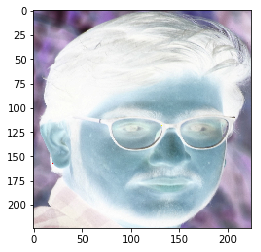

In [24]:
# load an image from file
image = load_img('Datasets/Train/Ash/Ash_train_01.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
plt.imshow(image)
# this is label one(Ashish)

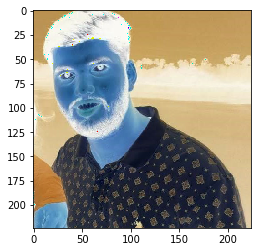

In [27]:
# load an image from file
image = load_img('Datasets/Train/Malav/Malav_train_06.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
plt.imshow(image)
# this is label 2 (malav)

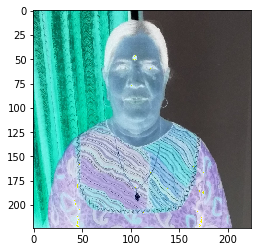

In [31]:
# load an image from file
image = load_img('Datasets/Train/Nani/Nani_train_10.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
plt.imshow(image)
# this is label 3(Nani)

### here i am using three labels face  recornizer.

In [13]:
r = model.fit_generator(
        training_set,
        validation_data= test_set,
        epochs=5,
        steps_per_epoch= len(training_set),
        validation_steps=len(test_set)
        )


Epoch 1/5
18/18 [==============================] - 1869s 104s/step - loss: 0.6153 - accuracy: 0.7596 - val_loss: 0.4281 - val_accuracy: 0.8058
Epoch 2/5
18/18 [==============================] - 1143s 64s/step - loss: 0.1993 - accuracy: 0.9246 - val_loss: 0.1537 - val_accuracy: 0.9223
Epoch 3/5
18/18 [==============================] - 1153s 64s/step - loss: 0.0846 - accuracy: 0.9754 - val_loss: 0.2668 - val_accuracy: 0.8932
Epoch 4/5
18/18 [==============================] - 1495s 83s/step - loss: 0.0460 - accuracy: 0.9877 - val_loss: 0.3429 - val_accuracy: 0.8738
Epoch 5/5
18/18 [==============================] - 1392s 77s/step - loss: 0.0306 - accuracy: 0.9965 - val_loss: 0.2892 - val_accuracy: 0.8738


### train - validation loss

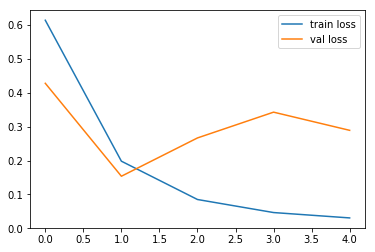

In [17]:
plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()

## lets test with new image

In [19]:
# load an image from file
image = load_img('Demo/Ashish_demo.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# predict the probability across all output classes
yhat = model.predict(image)
yhat

array([[1.000000e+00, 1.094187e-30, 6.779179e-16]], dtype=float32)

1 means Ashish, work successfully 

In [18]:
from tensorflow.keras.models import load_model
model.save('Final_Model_Face.h5')
print('Successfully saved')

Successfully loaded
